# Pre-processing Green's Functions calculated with SPECFEM3D for source-side MTUQ force estimations

-------------------------
 
[MTUQ has the capability of reading Green's Functions](https://uafgeotools.github.io/mtuq/user_guide/03.html) calculated in Specfem3D to incorporate 3D velocity models for force estimation.
 
This example aims to guide the pre-processing of the output plain-text files (synthetic seismograms) created by Specfem3D after a simulation. Then, convert them into SAC files with the appropriate name for being read by MTUQ as a Green's Functions database.

# Exploring the force input of SPECFEM3D

-------------------------

This example has been built using Green's Functions generated using the FORCESOLUTION file as the source input. You can run the cell below to see an example FORCESOLUTION file:

In [ ]:
!!more FORCESOLUTION

To generate all the Green's Functions required for use in MTUQ, you will have to run SPECFEM3D 3 times (or set it up to run using NUMBER_OF_SIMULTANEOUS_RUNS) for each component direction. We suggest you store them in a single directory with 3 subdirectories: E_force, N_force, and Z_force. This particular script is looking for those subdirectories. Part of the processing steps in this Notebook is to take the resulting seismograms and scale them appropriately - for a factor force source of 1e15 (the default in the above FORCESOLUTION), a carefully defined mesh in SPECFEM3D, and data downloaded in SI units (m, m/s, m/s^2), all that needs to be done is divide the Green's Functions by 1e15 to arrive at a unit impulse. The provided data for the default examples in MTUQ is in units of cm/s, so an additional scaling factor is required.

# Exploring the outputs of SPECFEM3D

-------------------------

The scaling factor is likely to change depending on your [input units for your model in SPECFEM3D](https://github.com/orgs/SPECFEM/discussions/1567#discussioncomment-4262754), since the output units for your seismograms will also change based on that. However, if your model is defined in SI units, your output will also be in SI units. This is important in regards to scaling the Green's Functions. 

Additionally, the output format for the seismograms is ASCII, and MTUQ requires SAC files. The other two parts of preprocessing the Green's Functions are to build the SAC headers from the FORCESOLUTION and STATIONS files, rewrite the ASCII files into SAC files, and finally rotate the Green's Functions from a ZNE coordinate system to the RTZ coordinate system. This differs from any preprocessing done for Green's Functions made in SPECFEM3D_Globe, as the global code is able to write seismograms in SAC format and save RTZ seismograms. It is important, however, to be sure that you have saved displacement seismograms in SPECFEM3D, as this script will *not* integrate or differentiate the seismograms to give you displacement Green's Functions.

You will have to know the event origin time, as that information is not saved anywhere in the FORCESOLUTION or STATIONS files.

# Preprocessing the Green's Functions

-------------------------

The main script for all the steps discussed above is process_F_GFs.py. We will first explore a force representation of an earthquake; specifically the 2009 Anchorage event that is the default example event. You can run the cell below to use the script:

In [ ]:
%run process_F_GFs.py

You should now have a ready-to-use database of source-side Green's Functions for use in MTUQ! These are stored in the directory PROCESSED, and the original Green's Functions should still be available to you as well, as a backup option. If you use this script for another event, you will have to empty the PROCESSED directory, to avoid any mixup between the Green's Functions for different events.

# Using the Green's Functions in MTUQ

-------------------------

We have provided two scripts for use in MTUQ to run the force inversion for 2 separate earthquakes. One is the default 2009 Anchorage event, which the data is already available in the examples directory of MTUQ (once it is [installed appropriately](https://uafgeotools.github.io/mtuq/install/index.html)). The Green's Functions for this event were preprocessed in the cell above, and you will have to modify the variable SF_path in Line 42 in the script to point at the absolute path to PROCESSED. You should now be able to run ForceGridSearch_2009.py, and compare the output to the figure below.

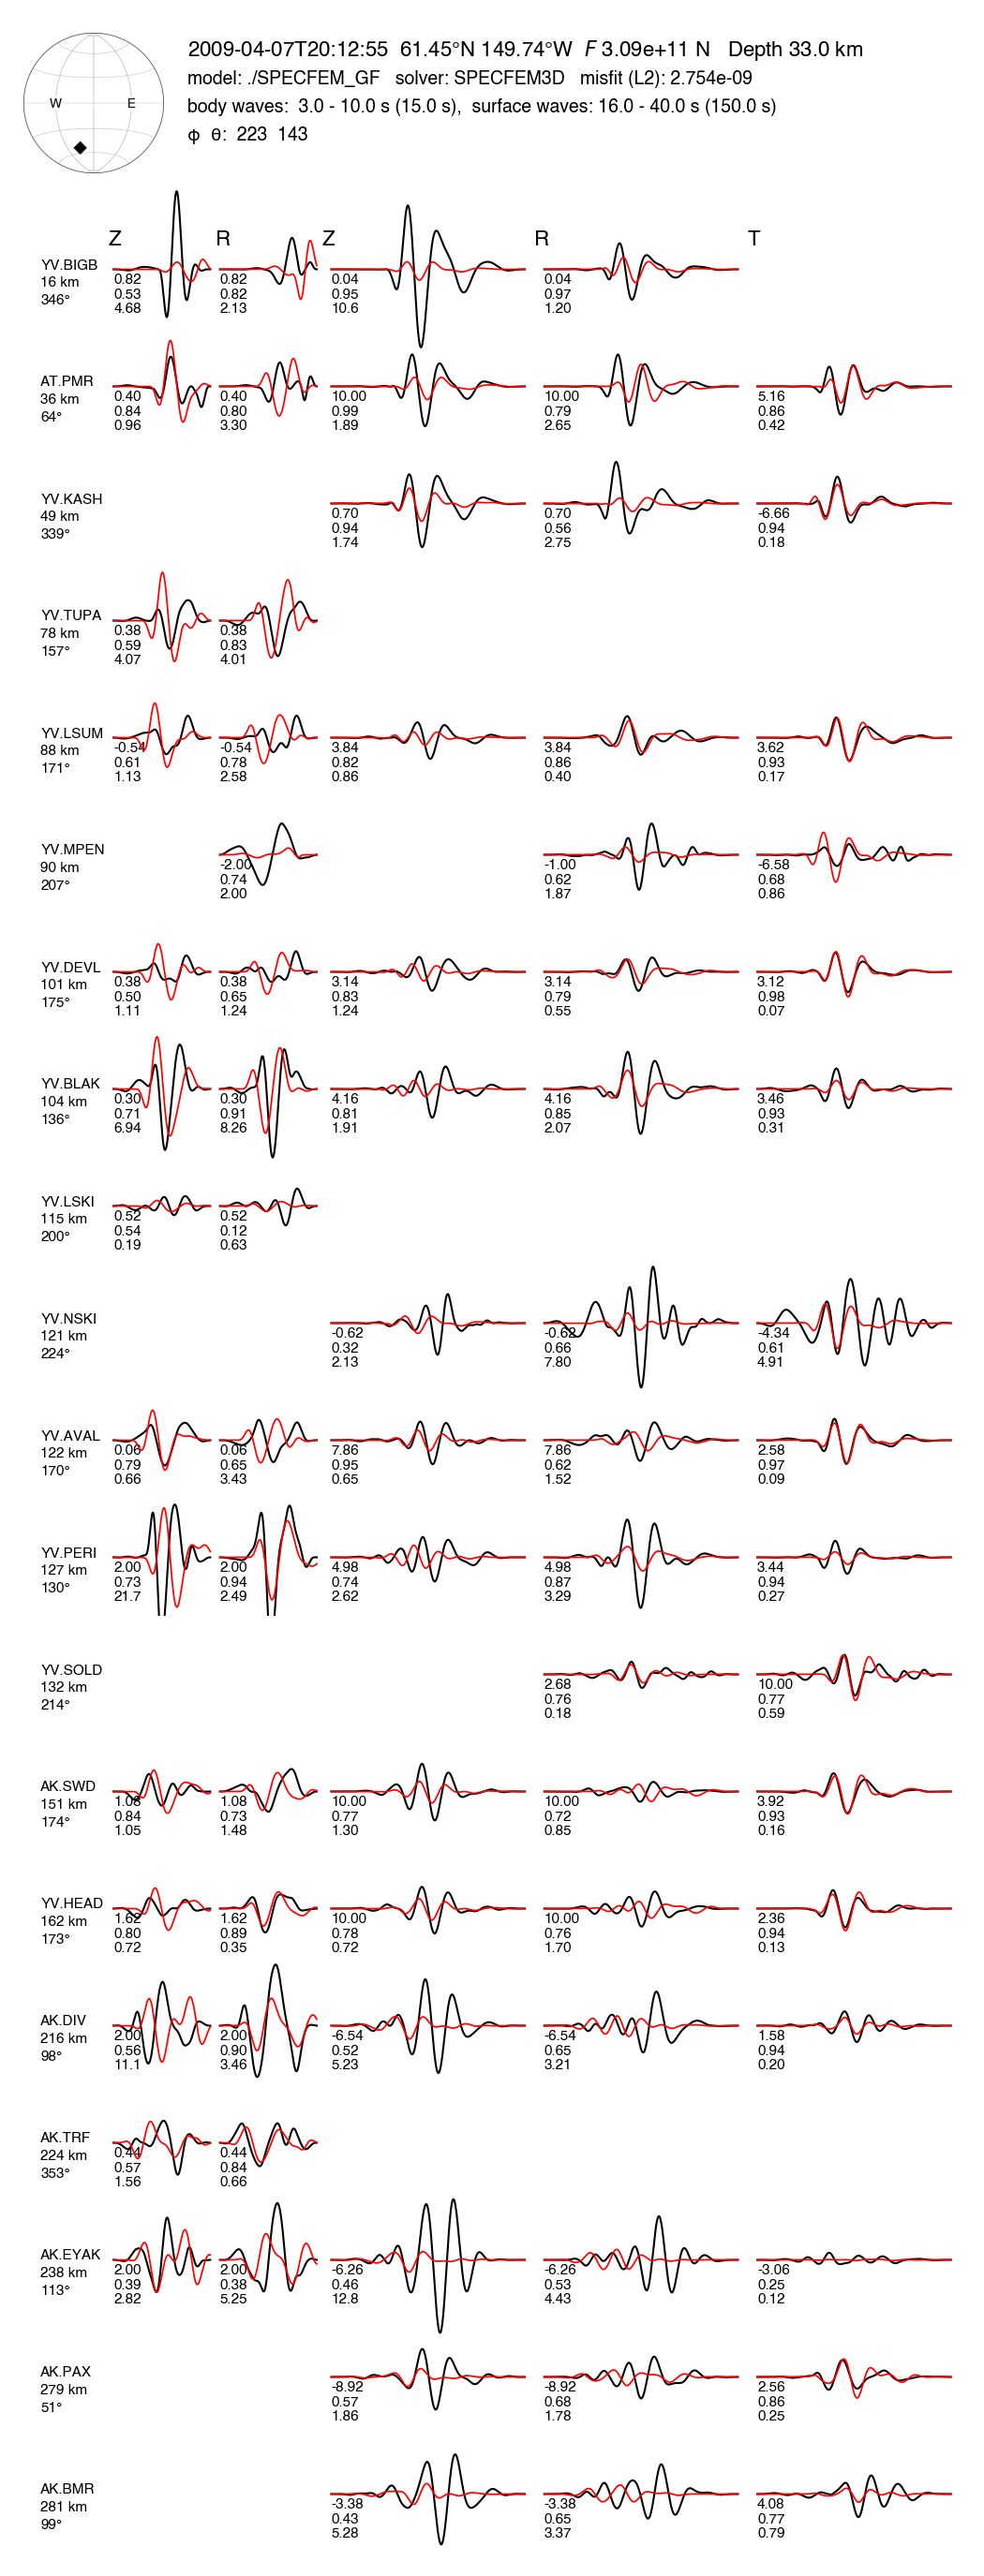

You can also compare this figure to the [results for the same event](https://uafgeotools.github.io/mtuq/user_guide/05/gallery_force.html), using Green's Functions downloaded from syngine. The differences between the two can likely be explained by the velocity model differences and/or the methods used to make the Green's Functions.

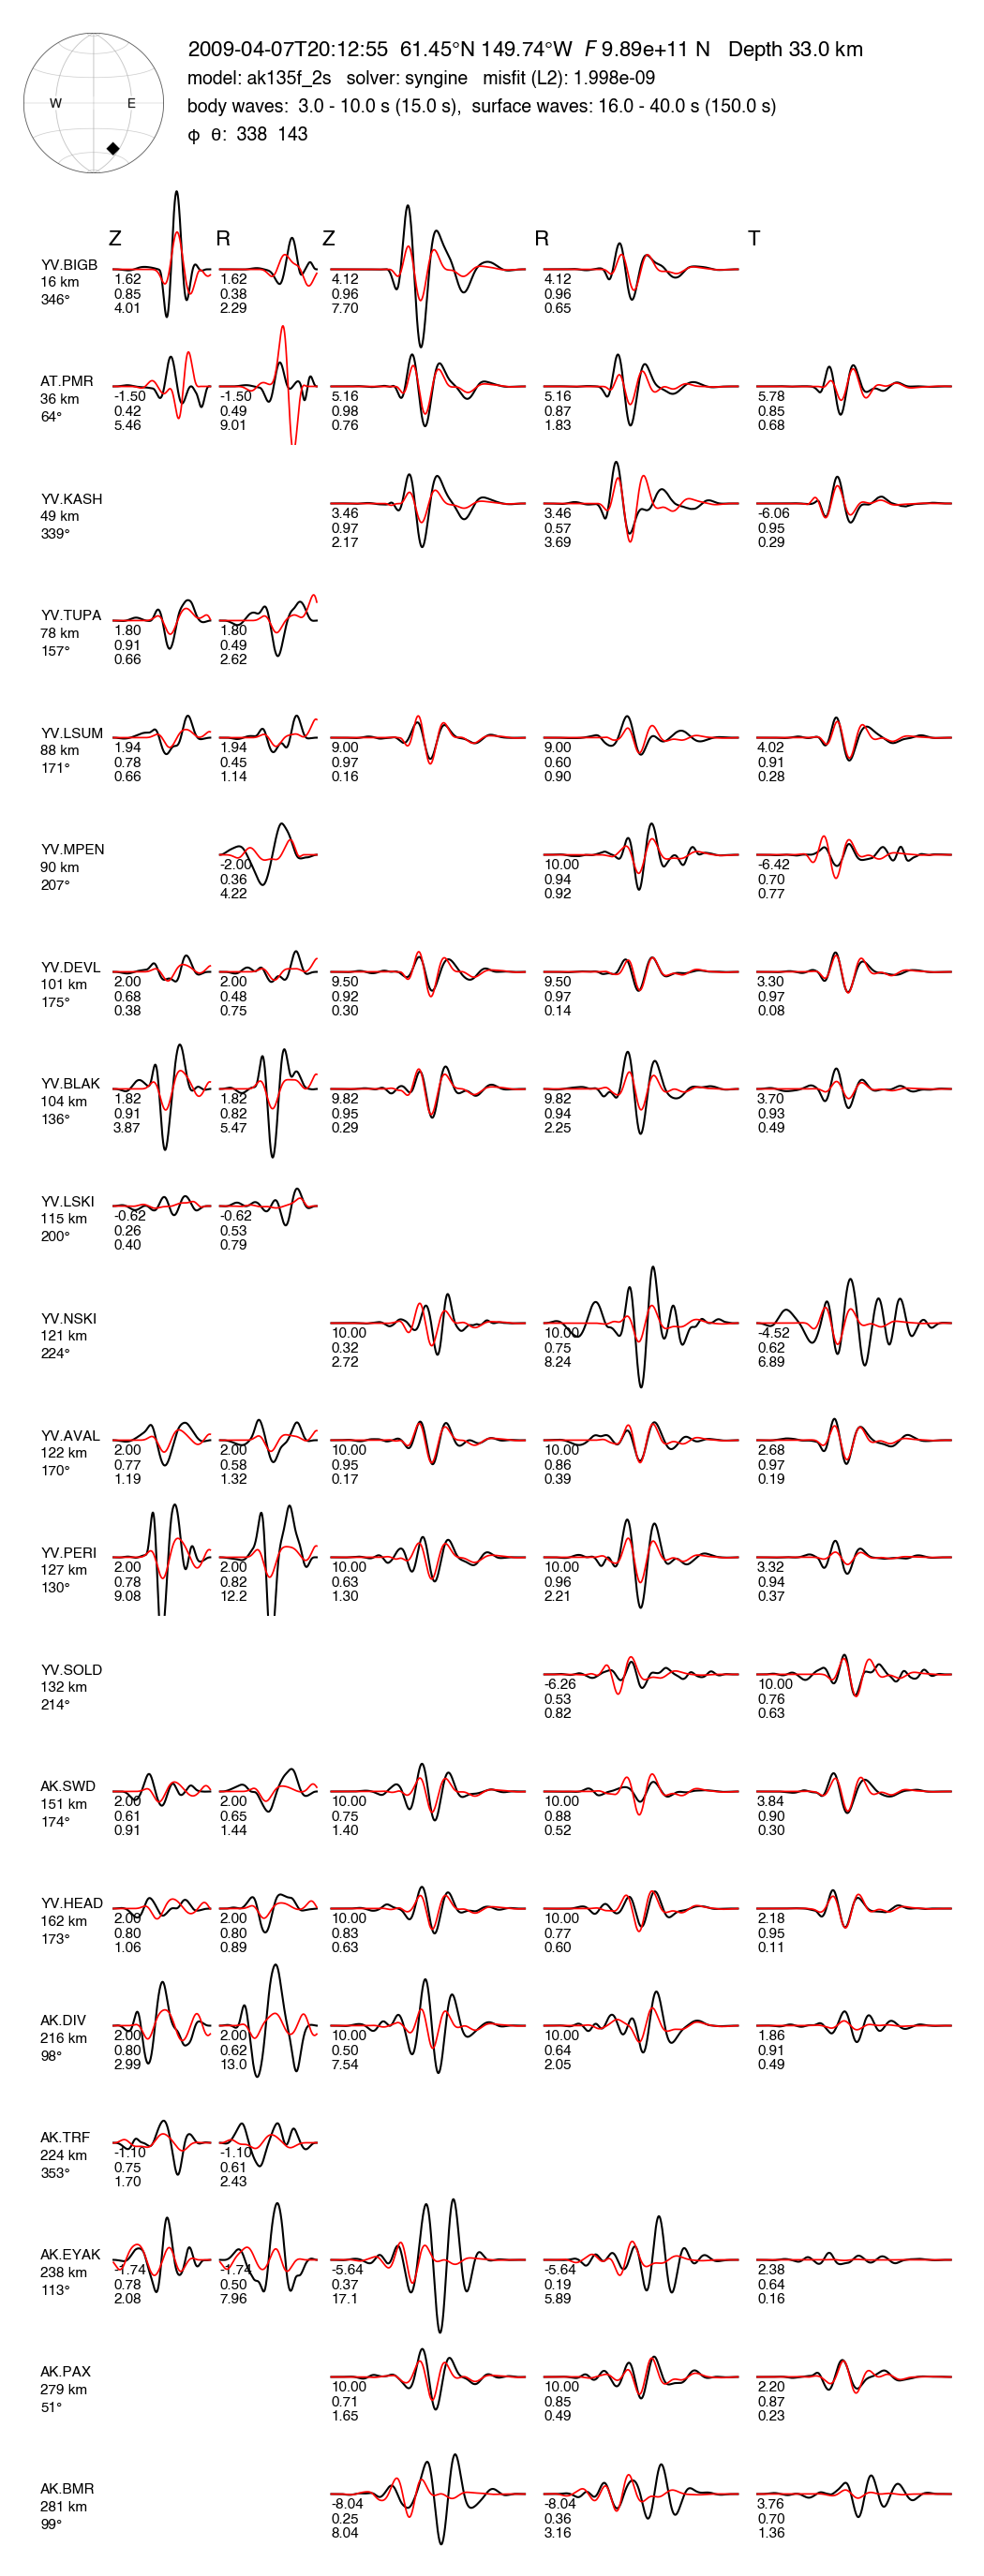